In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('studentGrade').getOrCreate()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
font = {'size'   : 10}
plt.rc('font', **font)

In [4]:
# Importing data which has a header. Schema is automatically configured.
df = spark.read.csv('stu_por_GP.csv', header=True, inferSchema=True)
#df.show()
df.head(1)

[Row(school='GP', Course='Portuguese', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=4, G1=0, G2=11, G3=11)]

In [5]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import when, count, col

In [6]:
df.toPandas().head()

,school,Course,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,Portuguese,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,GP,Portuguese,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,GP,Portuguese,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,GP,Portuguese,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,GP,Portuguese,F,16,U,GT3,T,3,3,None,...,4,3,2,1,2,5,0,11,13,13


In [7]:
df.columns

['school',
 'Course',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [8]:
print((df.count(), len(df.columns)))

(423, 34)


## 2.2 describe data

In [9]:
df.dtypes

[('school', 'string'),
 ('Course', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'int'),
 ('goout', 'int'),
 ('Dalc', 'int'),
 ('Walc', 'int'),
 ('health', 'int'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int')]

In [10]:
stu_por_GP=df.toPandas()

In [11]:
typename = pd.DataFrame (stu_por_GP.columns,columns=['feature name'])

In [12]:
flag_type=['school', 'Course', 'sex','address', 'famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic']
nominal_type=['Mjob', 'Fjob', 'reason', 'guardian']
ordinal_type=[ 'Medu', 'Fedu','traveltime', 'studytime', 'failures','famrel', 'freetime','goout', 'Dalc', 'Walc', 'health', ]
numerical_type=['age','absences', 'G1', 'G2', 'G3']
flag_type_except=[ 'sex','address', 'famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic']

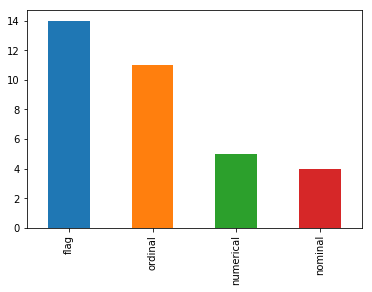

In [13]:
# visualize the type of features
for i in typename['feature name']:
    if i in flag_type:
        typename.loc[typename["feature name"]==i,"feature type"]="flag"
    if i in nominal_type:
        typename.loc[typename["feature name"]==i,"feature type"]="nominal"
    if i in ordinal_type:
        typename.loc[typename["feature name"]==i,"feature type"]="ordinal"
    if i in numerical_type:
        typename.loc[typename["feature name"]==i,"feature type"]="numerical"
typename['feature type'].value_counts().plot(kind='bar')

Text(0.5,1,"father's education")

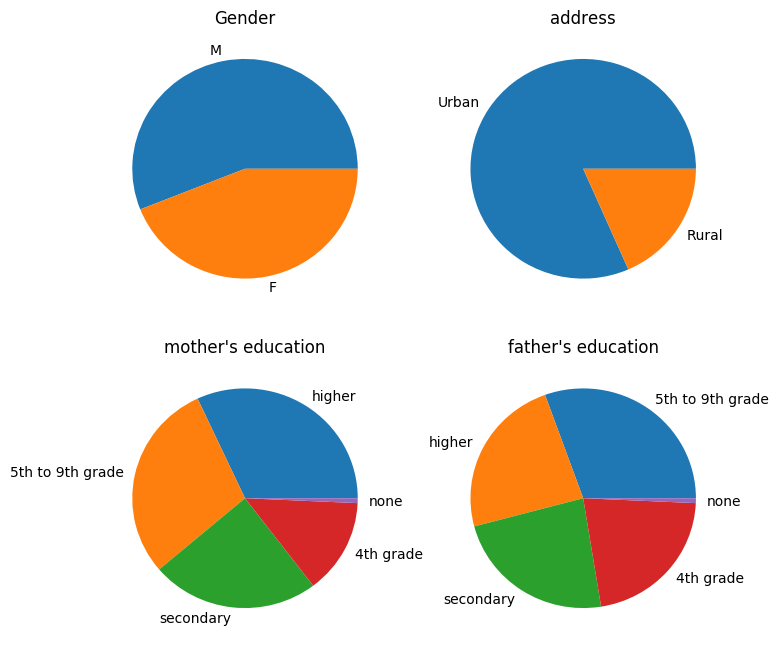

In [14]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 100
font = {'size'   : 10}
plt.rc('font', **font)
fig,axes=plt.subplots(2,2)
axes[0,1].pie(x=stu_por_GP.address.value_counts(),labels=['Urban','Rural'])
axes[0,1].set_title('address')
axes[0,0].pie(x=stu_por_GP.sex.value_counts(),labels=['M','F'])
axes[0,0].set_title('Gender')
axes[1,0].pie(x=stu_por_GP.Medu.value_counts(),labels=['higher','5th to 9th grade','secondary','4th grade','none'])
axes[1,0].set_title('mother\'s education')
axes[1,1].pie(x=stu_por_GP.Fedu.value_counts(),labels=['5th to 9th grade','higher','secondary','4th grade','none'])
axes[1,1].set_title('father\'s education')

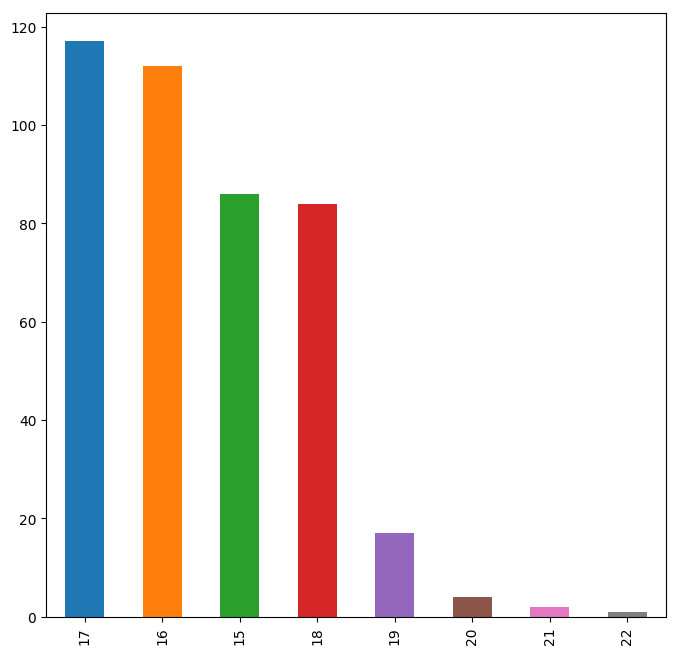

In [15]:
stu_por_GP.age.value_counts().plot(kind='bar')

In [16]:
# Unique values of string columns
df.select("school").distinct().show()
df.select("sex").distinct().show()
df.select("address").distinct().show()
df.select("famsize").distinct().show()
df.select("Pstatus").distinct().show()
df.select("Mjob").distinct().show()
df.select("Fjob").distinct().show()
df.select("reason").distinct().show()
df.select("guardian").distinct().show()
df.select("schoolsup").distinct().show()
df.select("famsup").distinct().show()
df.select("paid").distinct().show()
df.select("activities").distinct().show()
df.select("nursery").distinct().show()
df.select("higher").distinct().show()
df.select("internet").distinct().show()
df.select("romantic").distinct().show()

+------+
|school|
+------+
|    GP|
+------+

+---+
|sex|
+---+
|  F|
|  M|
+---+

+-------+
|address|
+-------+
|      U|
|      R|
+-------+

+-------+
|famsize|
+-------+
|    LE3|
|    GT3|
+-------+

+-------+
|Pstatus|
+-------+
|      T|
|      A|
+-------+

+--------+
|    Mjob|
+--------+
| at_home|
| teacher|
|    null|
|  health|
|services|
+--------+

+--------+
|    Fjob|
+--------+
| at_home|
| teacher|
|    null|
|  health|
|services|
+--------+

+----------+
|    reason|
+----------+
|reputation|
|      null|
|    course|
|      home|
+----------+

+--------+
|guardian|
+--------+
|  father|
|    null|
|  mother|
+--------+

+---------+
|schoolsup|
+---------+
|       no|
|      yes|
+---------+

+------+
|famsup|
+------+
|    no|
|   yes|
+------+

+----+
|paid|
+----+
|  no|
| yes|
+----+

+----------+
|activities|
+----------+
|        no|
|       yes|
+----------+

+-------+
|nursery|
+-------+
|     no|
|    yes|
+-------+

+------+
|higher|
+------+
|    no|
|   

In [17]:
# Unique values of integer columns
df.select("age").distinct().show()
df.select("Fedu").distinct().show()
df.select("Medu").distinct().show()
df.select("traveltime").distinct().show()
df.select("studytime").distinct().show()
df.select("failures").distinct().show()
df.select("famrel").distinct().show()
df.select("freetime").distinct().show()
df.select("goout").distinct().show()
df.select("Dalc").distinct().show()
df.select("Walc").distinct().show()
df.select("health").distinct().show()
df.select("absences").distinct().show()
df.select("G1").distinct().show()
df.select("G2").distinct().show()
df.select("G3").distinct().show()

+---+
|age|
+---+
| 22|
| 16|
| 20|
| 19|
| 15|
| 17|
| 21|
| 18|
+---+

+----+
|Fedu|
+----+
|   1|
|   3|
|   4|
|   2|
|   0|
+----+

+----+
|Medu|
+----+
|   1|
|   3|
|   4|
|   2|
|   0|
+----+

+----------+
|traveltime|
+----------+
|         1|
|         3|
|         4|
|         2|
+----------+

+---------+
|studytime|
+---------+
|        1|
|        3|
|        4|
|        2|
+---------+

+--------+
|failures|
+--------+
|       1|
|       3|
|       2|
|       0|
+--------+

+------+
|famrel|
+------+
|     1|
|     3|
|     5|
|     4|
|     2|
+------+

+--------+
|freetime|
+--------+
|       1|
|       3|
|       5|
|       4|
|       2|
+--------+

+-----+
|goout|
+-----+
|    1|
|    3|
|    5|
|    4|
|    2|
+-----+

+----+
|Dalc|
+----+
|   1|
|   3|
|   5|
|   4|
|   2|
+----+

+----+
|Walc|
+----+
|   1|
|   3|
|   5|
|   4|
|   2|
+----+

+------+
|health|
+------+
|     1|
|     3|
|     5|
|     4|
|     2|
+------+

+--------+
|absences|
+--------+
|      26|

In [18]:

#Statistics of our data
#df.describe().show()
df.toPandas().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,423.0,16.666667,1.244895,15.0,16.0,17.0,18.0,22.0
Medu,423.0,2.725768,1.077769,0.0,2.0,3.0,4.0,4.0
Fedu,423.0,2.475177,1.096623,0.0,2.0,2.0,3.0,4.0
traveltime,423.0,1.430260,0.704913,1.0,1.0,1.0,2.0,4.0
studytime,423.0,2.014184,0.840214,1.0,1.0,2.0,2.0,4.0
failures,423.0,0.172577,0.551607,0.0,0.0,0.0,0.0,3.0
famrel,423.0,3.952719,0.891049,1.0,4.0,4.0,5.0,5.0
freetime,423.0,3.153664,0.986895,1.0,3.0,3.0,4.0,5.0
goout,423.0,3.146572,1.152899,1.0,2.0,3.0,4.0,5.0
Dalc,423.0,1.470449,0.899421,1.0,1.0,1.0,2.0,5.0


In [19]:
df.printSchema()

root
 |-- school: string (nullable = true)
 |-- Course: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (null

In [20]:
df.toPandas().skew(axis=0, skipna=True)

age           0.556165
Medu         -0.247237
Fedu          0.025588
traveltime    1.778461
studytime     0.623459
failures      3.636535
famrel       -0.977424
freetime     -0.118919
goout         0.046651
Dalc          2.268211
Walc          0.646040
health       -0.571081
absences      1.886107
G1           -0.065149
G2            0.293869
G3           -0.336157
dtype: float64

In [21]:
df.where(df.Mjob.isNull()).count()

162

## 2.3 explore data

In [22]:
# change format of graph
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 100
font = {'size'   : '10'}
plt.rc('font', **font)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc37250af60>,
      dtype=object)

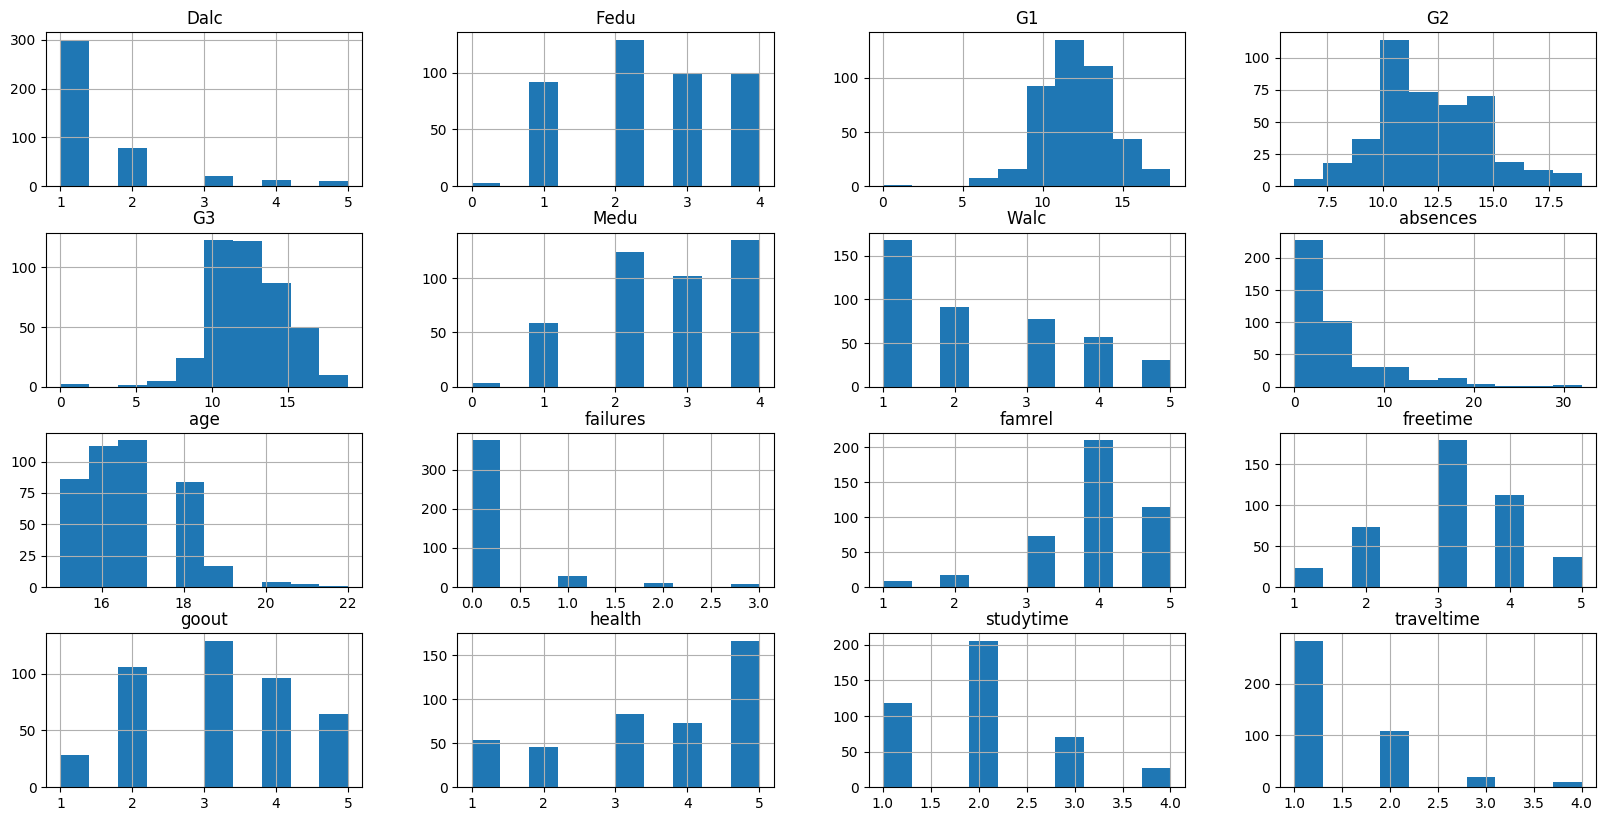

In [23]:
stu_por_GP[numerical_type+ordinal_type].hist()

In [24]:
def plot_multiple_countplots(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                stu_por_GP[col].value_counts().plot(kind='bar', ax=axs)
            else:
                stu_por_GP[col].value_counts().plot(kind='bar', ax=axs[j])
        else:
            stu_por_GP[col].value_counts().plot(kind='bar', ax=axs[i, j])


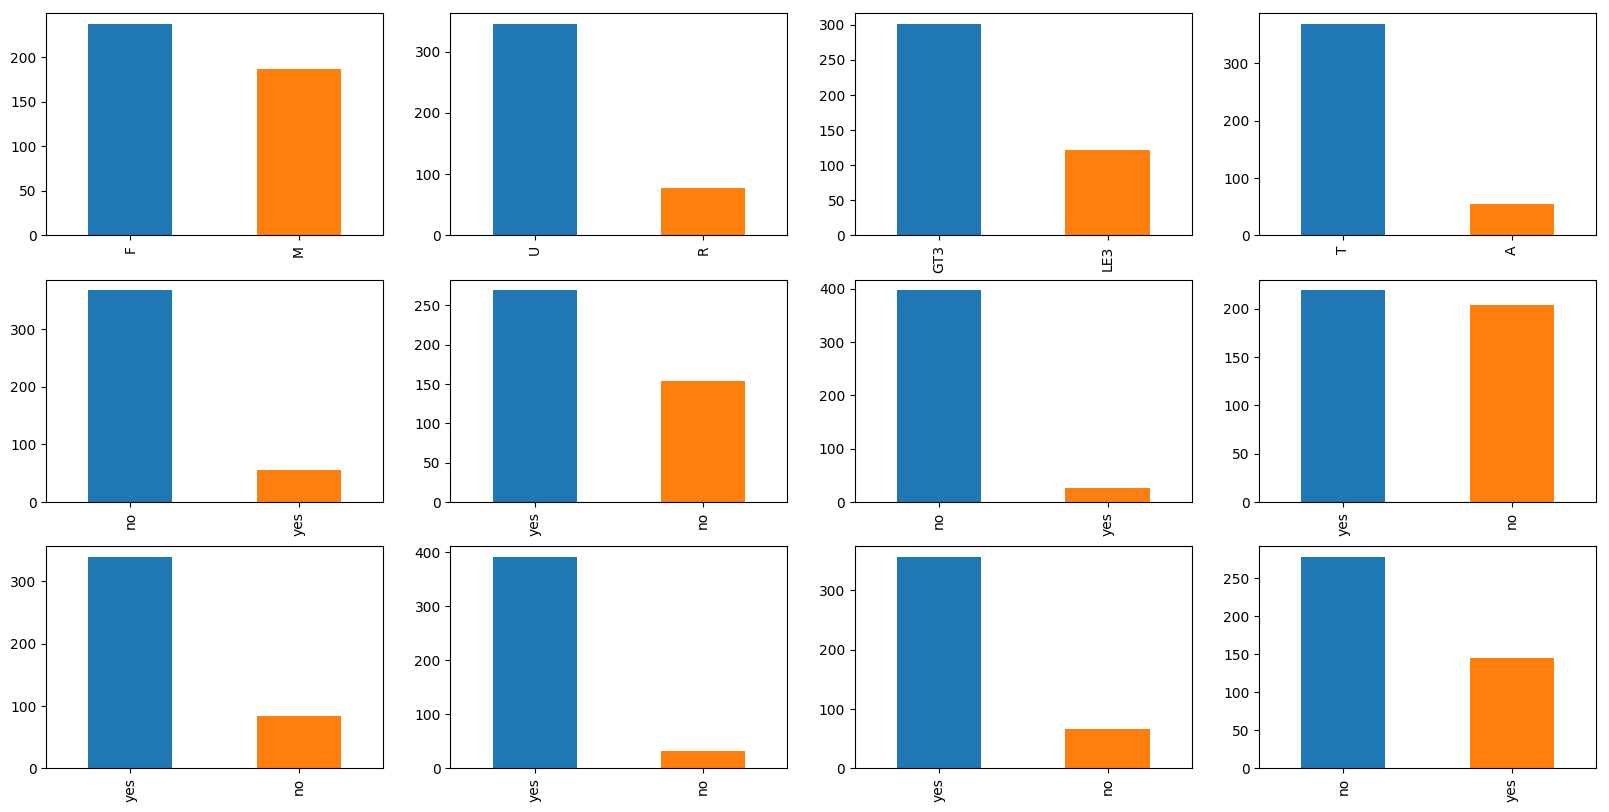

In [25]:
# multiplot for flag data
plot_multiple_countplots(stu_por_GP,flag_type_except)

Text(0.5,1,'absences vs G3')

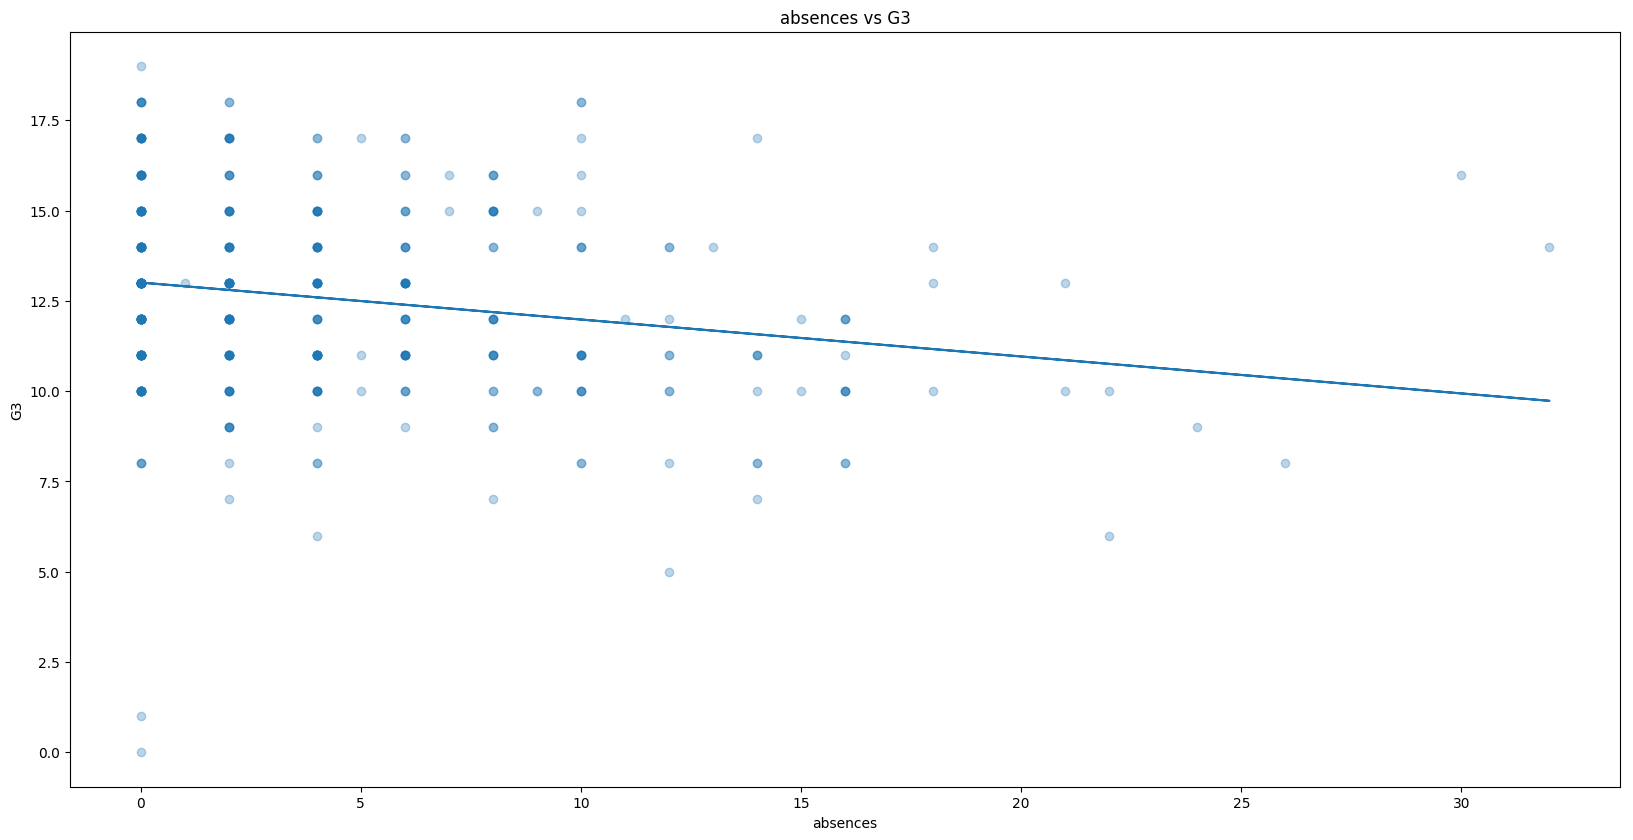

In [26]:
# visualize the relationship between independent variable with target
plt.scatter(stu_por_GP['absences'], stu_por_GP['G3'],cmap='viridis',alpha=0.3);
m, b = np.polyfit(stu_por_GP['absences'], stu_por_GP['G3'], 1)
plt.plot(stu_por_GP['absences'], m*stu_por_GP['absences'] + b)
plt.xlabel('absences') 
plt.ylabel('G3') 
plt.title("absences vs G3")

Text(0.5,1,'Fedu vs G3')

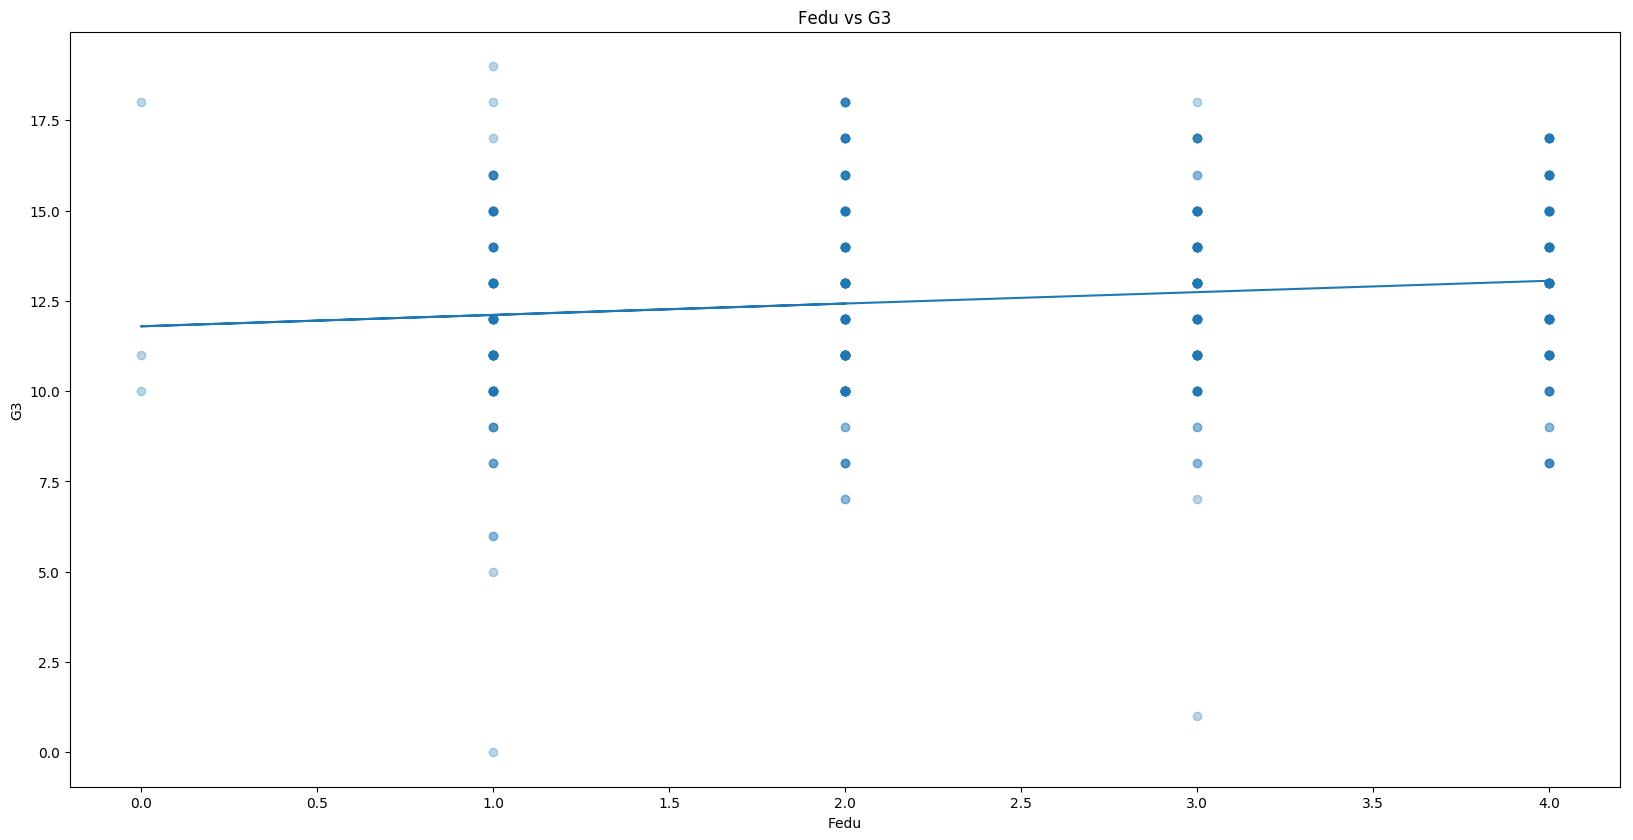

In [27]:
# visualize the relationship between independent variable with target
plt.scatter(stu_por_GP['Fedu'], stu_por_GP['G3'],cmap='viridis',alpha=0.3);
m, b = np.polyfit(stu_por_GP['Fedu'], stu_por_GP['G3'], 1)
plt.plot(stu_por_GP['Fedu'], m*stu_por_GP['Fedu'] + b)
plt.xlabel('Fedu') 
plt.ylabel('G3') 
plt.title("Fedu vs G3")

Text(0.5,1,'Medu vs G3')

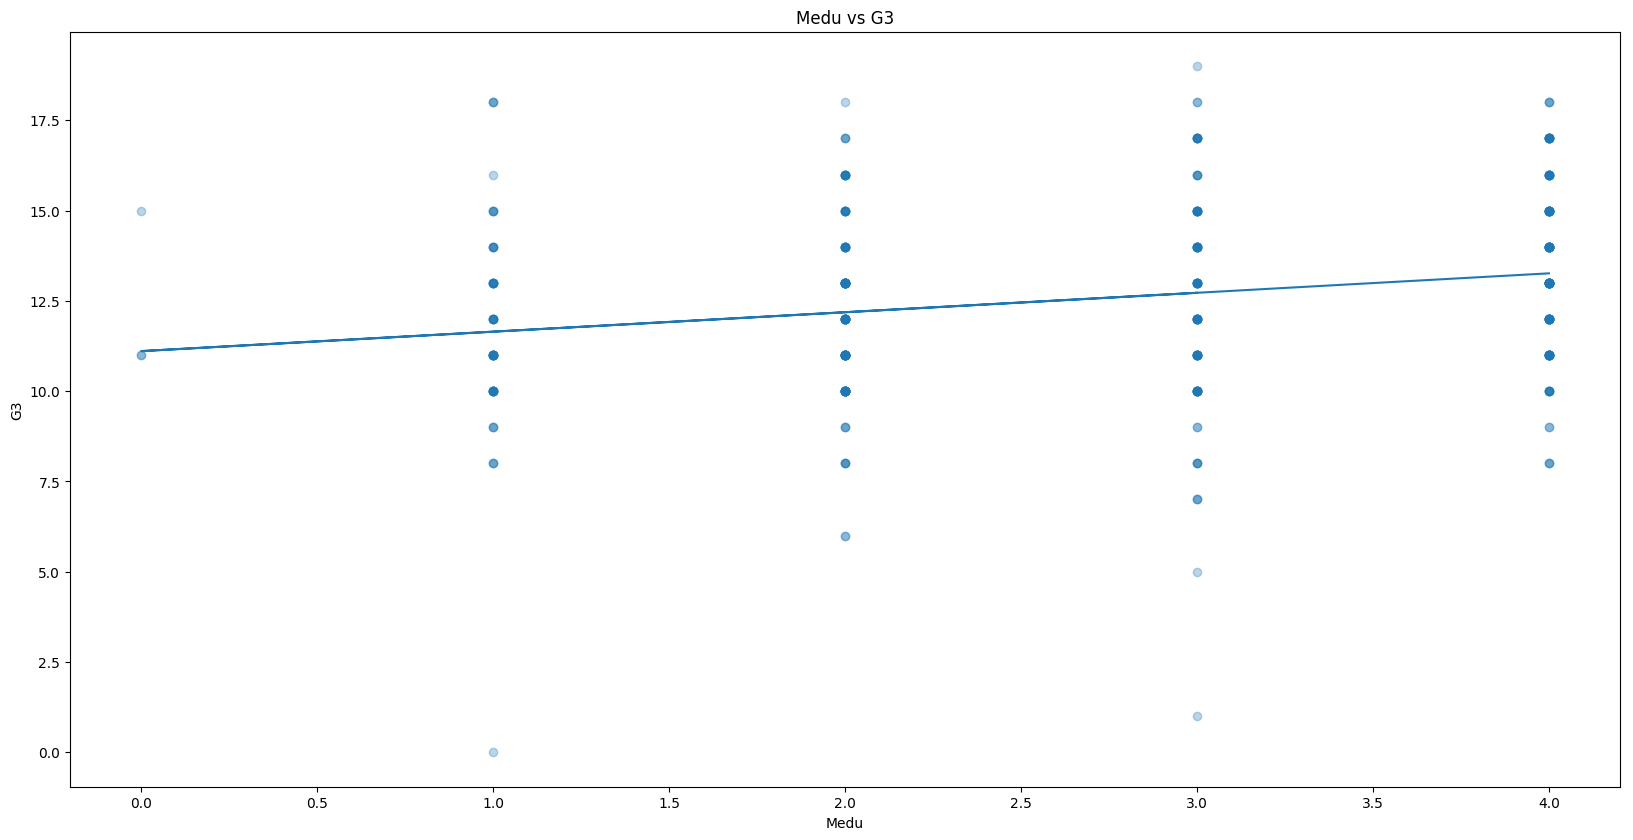

In [28]:
# visualize the relationship between independent variable with target

plt.scatter(stu_por_GP['Medu'], stu_por_GP['G3'],cmap='viridis',alpha=0.3);
m, b = np.polyfit(stu_por_GP['Medu'], stu_por_GP['G3'], 1)
plt.plot(stu_por_GP['Medu'], m*stu_por_GP['Medu'] + b)
plt.xlabel('Medu') 
plt.ylabel('G3') 
plt.title("Medu vs G3")

Text(0.5,1,'G1,G2 vs G3')

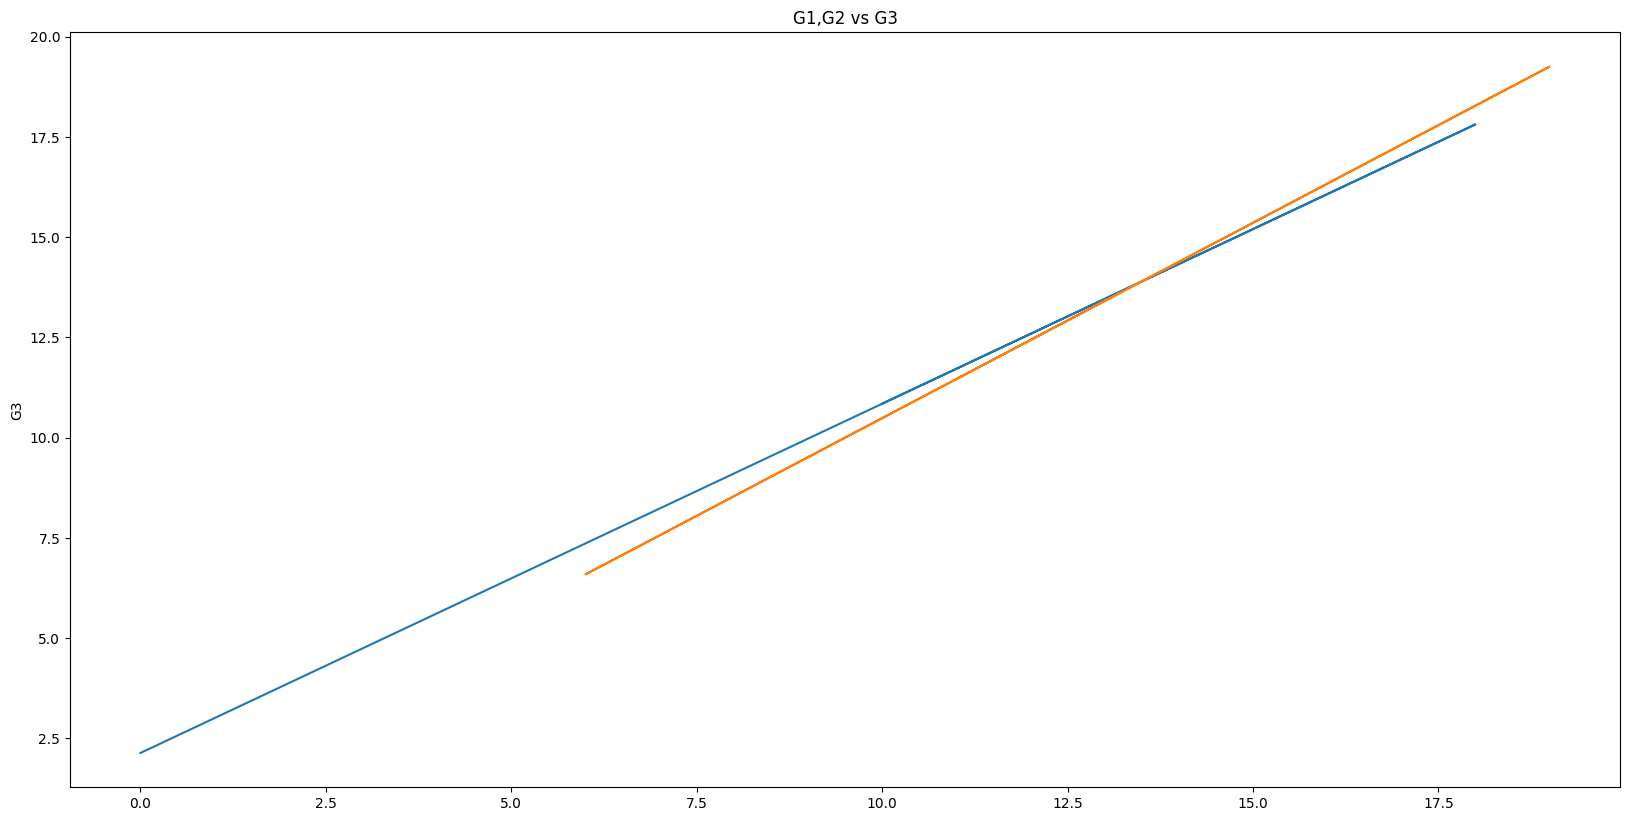

In [29]:
# visualize the relationship between the result in 3 examinations
m, b = np.polyfit(stu_por_GP['G1'], stu_por_GP['G3'], 1)
plt.plot(stu_por_GP['G1'], m*stu_por_GP['G1'] + b)
m, b = np.polyfit(stu_por_GP['G2'], stu_por_GP['G3'], 1)
plt.plot(stu_por_GP['G2'], m*stu_por_GP['G2'] + b)
plt.ylabel('G3') 
plt.title("G1,G2 vs G3")

## 2.4 quaility of data

In [30]:
First_part=['school', 'Course', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
 'guardian', 'traveltime', 'studytime', 'failures']

In [31]:
Second_part=['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

In [32]:
df[[First_part]].select([count(when(isnull(c), c)).alias(c) for c in df[[First_part]].columns]).show()
df[[Second_part]].select([count(when(isnull(c), c)).alias(c) for c in df[[Second_part]].columns]).show()

+------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+
|school|Course|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|
+------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+
|     0|     0|  0|  0|      0|      0|      0|   0|   0| 162| 249|    27|      28|         0|        0|       0|
+------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+

+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|        0|     0|   0|         0|      0|   

In [6]:
import matplotlib.pyplot as plt

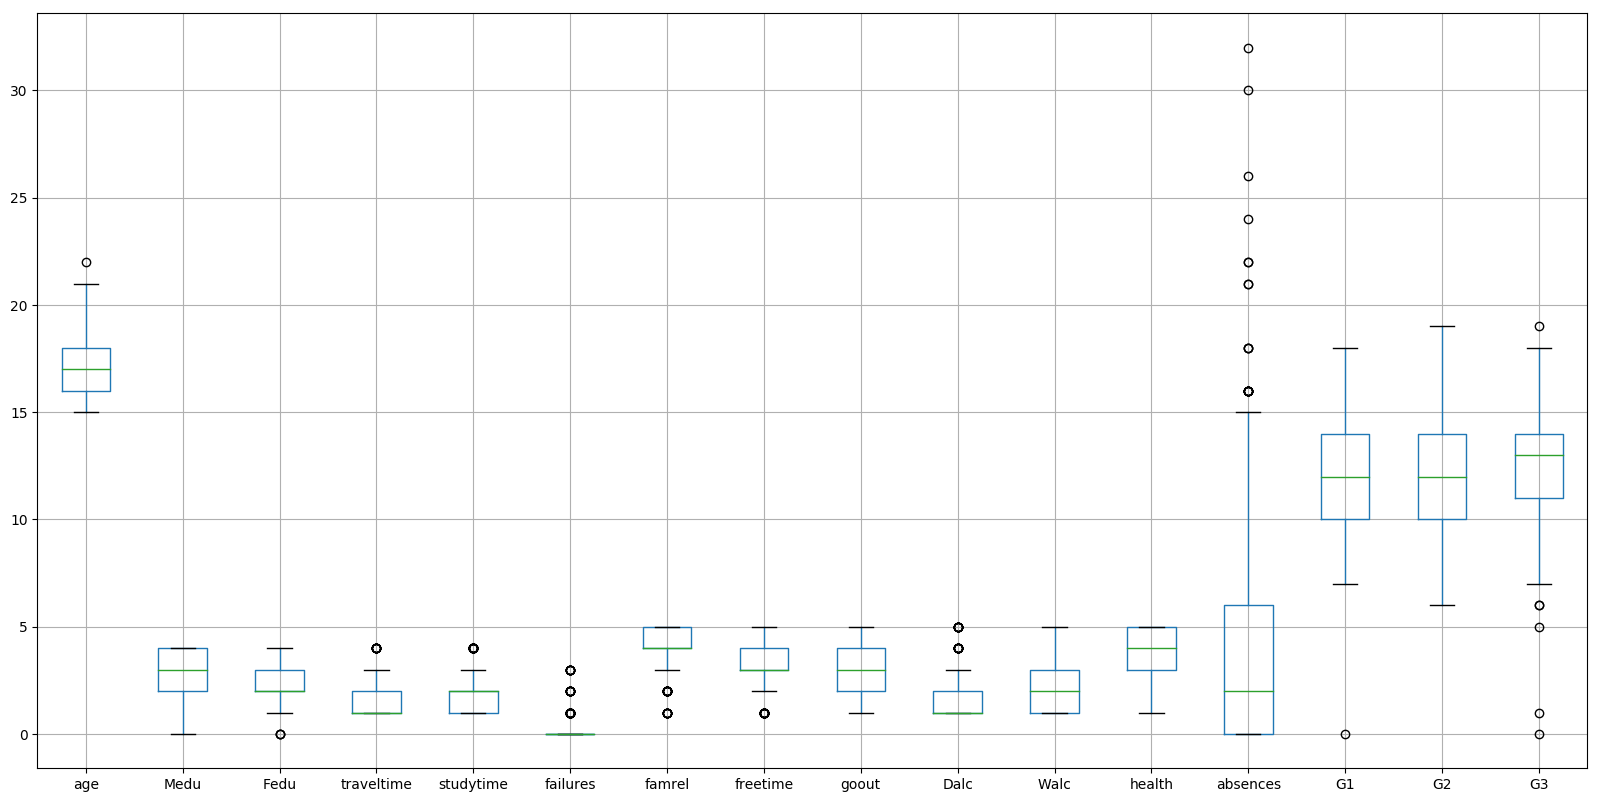

In [34]:
df.toPandas().boxplot(figsize=(20,10))
plt.show()

## 3.2 clean data

In [35]:
#find the outlier
for i in numerical_type:
    median = stu_por_GP[i].median()
    std = stu_por_GP[i].std()
    outliers = (stu_por_GP[i] - median).abs() > 2*std
    print('outlier in '+i+':'+str(outliers.sum()))
    extremes = (stu_por_GP[i] - median).abs() > 3*std
    print('extremes in '+i+':'+str(extremes.sum()))

outlier in age:7
extremes in age:3
outlier in absences:32
extremes in absences:11
outlier in G1:25
extremes in G1:1
outlier in G2:29
extremes in G2:0
outlier in G3:9
extremes in G3:3


In [14]:
#ountlier
def outliersReplacer(df):
    quantiles_age = df.approxQuantile('age',[0.25,0.75],0.05)
    IQR = quantiles_age[1] - quantiles_age[0]
    min_value_age = quantiles_age[0] - 1.5 * IQR
    max_value_age = quantiles_age[1] + 1.5 * IQR

    quantiles_abs = df.approxQuantile('absences',[0.25,0.75],0.05)
    IQR = quantiles_abs[1] - quantiles_abs[0]
    min_value_abs = quantiles_abs[0] - 1.5 * IQR
    max_value_abs = quantiles_abs[1] + 1.5 * IQR

    quantiles_g3 = df.approxQuantile('G3',[0.25,0.75],0.05)
    IQR = quantiles_g3[1] - quantiles_g3[0]
    min_value_g3 = quantiles_g3[0] - 1.5 * IQR
    max_value_g3 = quantiles_g3[1] + 1.5 * IQR

    quantiles_g1 = df.approxQuantile('G1',[0.25,0.75],0.05)
    IQR = quantiles_g1[1] - quantiles_g1[0]
    min_value_g1 = quantiles_g1[0] - 1.5 * IQR
    max_value_g1 = quantiles_g1[1] + 1.5 * IQR

    quantiles_g2 = df.approxQuantile('G2',[0.25,0.75],0.05)
    IQR = quantiles_g2[1] - quantiles_g2[0]
    min_value_g2 = quantiles_g2[0] - 1.5 * IQR
    max_value_g2 = quantiles_g2[1] + 1.5 * IQR

    df = df.filter((df['age'] >= min_value_age) & 
                  (df['age'] <= max_value_age)&
                  (df['absences'] >= min_value_abs) & 
                  (df['absences'] <= max_value_abs) &
                 (df['G3'] >= min_value_g3) & 
                  (df['G3'] <= max_value_g3)&
                (df['G2'] >= min_value_g2) & 
                  (df['G2'] <= max_value_g2)&
                (df['G1'] >= min_value_g1) & 
                  (df['G1'] <= max_value_g1))
outliersReplacer(df)

In [37]:
stu_por_GP=df.toPandas()
#check the outlier
for i in numerical_type:
    median = stu_por_GP[i].median()
    std = stu_por_GP[i].std()
    outliers = (stu_por_GP[i] - median).abs() > 2*std
    print('outlier in '+i+':'+str(outliers.sum()))
    extremes = (stu_por_GP[i] - median).abs() > 3*std
    print('extremes in '+i+':'+str(extremes.sum()))

outlier in age:7
extremes in age:3
outlier in absences:32
extremes in absences:11
outlier in G1:25
extremes in G1:1
outlier in G2:29
extremes in G2:0
outlier in G3:9
extremes in G3:3


In [38]:
# Impute missing values in column failures
df = df.na.fill({'Mjob': 'other','Fjob': 'other','reason': 'other','guardian': 'other'})

In [39]:
df[[First_part]].select([count(when(isnull(c), c)).alias(c) for c in df[[First_part]].columns]).show()
df[[Second_part]].select([count(when(isnull(c), c)).alias(c) for c in df[[Second_part]].columns]).show()

+------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+
|school|Course|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|
+------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+
|     0|     0|  0|  0|      0|      0|      0|   0|   0|   0|   0|     0|       0|         0|        0|       0|
+------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+

+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|        0|     0|   0|         0|      0|   

## 3.3 Construct data

In [26]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import StringIndexer, OneHotEncoder,VectorAssembler
from pyspark.ml import Pipeline

In [27]:
numerical_columns=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences']
categorical_columns = ['sex', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'higher', 'internet', 'romantic']

In [15]:
def construct(df,categorical_columns,numerical_columns):
    stringindexer_stages = [StringIndexer(inputCol=c, outputCol='strindexed_' + c) for c in categorical_columns]
    # encode label column and add it to stringindexer_stages
    stringindexer_stages += [StringIndexer(inputCol='G3', outputCol='label')]
    
    onehotencoder_stages = [OneHotEncoder(inputCol='strindexed_' + c, outputCol='onehot_' + c) for c in categorical_columns]
    
    feature_columns = ['onehot_' + c for c in categorical_columns]
    feature_columns += numerical_columns
    vectorassembler_stage = VectorAssembler(inputCols=feature_columns, outputCol='features')
    
    allc = stringindexer_stages + onehotencoder_stages + [vectorassembler_stage]
    pipeline = Pipeline(stages=allc)
    pipeline_model = pipeline.fit(df)
    final_columns = feature_columns + ['features', 'label']
    constructed = pipeline_model.transform(df).\
            select(final_columns)
            
    return constructed

In [43]:
construct(df,categorical_columns,numerical_columns).show(1)

+-------------+--------------+--------------+----------------+-------------+-------------+-------------+---------------+---------------+---+----+----+----------+---------+--------+------+--------+-----+----+------+--------+--------------------+-----+
|   onehot_sex|onehot_famsize|onehot_Pstatus|onehot_schoolsup|onehot_famsup|  onehot_paid|onehot_higher|onehot_internet|onehot_romantic|age|Medu|Fedu|traveltime|studytime|failures|famrel|freetime|goout|Dalc|health|absences|            features|label|
+-------------+--------------+--------------+----------------+-------------+-------------+-------------+---------------+---------------+---+----+----+----------+---------+--------+------+--------+-----+----+------+--------+--------------------+-----+
|(1,[0],[1.0])| (1,[0],[1.0])|     (1,[],[])|       (1,[],[])|    (1,[],[])|(1,[0],[1.0])|(1,[0],[1.0])|      (1,[],[])|  (1,[0],[1.0])| 18|   4|   4|         2|        2|       0|     4|       3|    4|   1|     3|       4|[1.0,1.0,0.0,0.0,...|  0

In [44]:
df.show()

+------+----------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|    Course|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+----------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|    GP|Portuguese|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     

## 3.5 Integrate various data sources

In [7]:
df1 = spark.read.csv('stu_por_GP.csv', header=True, inferSchema=True)
df2 = spark.read.csv('stu_por_MS.csv', header=True, inferSchema=True)
df3 = spark.read.csv('stu_mat_GP.csv', header=True, inferSchema=True)
df4 = spark.read.csv('stu_mat_MS.csv', header=True, inferSchema=True)

In [8]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

['school', 'Course', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
['school', 'Course', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
['school', 'Course', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1'

In [9]:
df= df1.union(df2).union(df3).union(df4)

In [48]:
df.select("school").distinct().show()
df.select("Course").distinct().show()
df.select("sex").distinct().show()
df.select("address").distinct().show()
df.select("famsize").distinct().show()
df.select("Pstatus").distinct().show()
df.select("Mjob").distinct().show()
df.select("Fjob").distinct().show()
df.select("reason").distinct().show()
df.select("guardian").distinct().show()
df.select("schoolsup").distinct().show()
df.select("famsup").distinct().show()
df.select("paid").distinct().show()
df.select("activities").distinct().show()
df.select("nursery").distinct().show()
df.select("higher").distinct().show()
df.select("internet").distinct().show()
df.select("romantic").distinct().show()

+------+
|school|
+------+
|    MS|
|    GP|
+------+

+----------+
|    Course|
+----------+
|      Math|
|Portuguese|
+----------+

+------+
|   sex|
+------+
|     F|
|Female|
|     M|
|  Male|
+------+

+-------+
|address|
+-------+
|      U|
|      R|
+-------+

+-------+
|famsize|
+-------+
|    LE3|
|    GT3|
+-------+

+-------+
|Pstatus|
+-------+
|      T|
|      A|
+-------+

+--------+
|    Mjob|
+--------+
| at_home|
| teacher|
|    null|
|  health|
|services|
+--------+

+--------+
|    Fjob|
+--------+
| at_home|
| teacher|
|    null|
|  health|
|services|
+--------+

+----------+
|    reason|
+----------+
|reputation|
|      null|
|    course|
|      home|
+----------+

+--------+
|guardian|
+--------+
|  father|
|    null|
|  mother|
+--------+

+---------+
|schoolsup|
+---------+
|       no|
|      yes|
+---------+

+------+
|famsup|
+------+
|    no|
|   yes|
+------+

+----+
|paid|
+----+
|  no|
| yes|
+----+

+----------+
|activities|
+----------+
|        no|
|   

In [49]:
df.select("age").distinct().show()
df.select("Fedu").distinct().show()
df.select("Medu").distinct().show()
df.select("traveltime").distinct().show()
df.select("studytime").distinct().show()
df.select("failures").distinct().show()
df.select("famrel").distinct().show()
df.select("freetime").distinct().show()
df.select("goout").distinct().show()
df.select("Dalc").distinct().show()
df.select("Walc").distinct().show()
df.select("health").distinct().show()
df.select("absences").distinct().show()
df.select("G1").distinct().show()
df.select("G2").distinct().show()
df.select("G3").distinct().show()

+---+
|age|
+---+
| 22|
| 16|
| 20|
| 19|
| 15|
| 17|
| 21|
| 18|
+---+

+----+
|Fedu|
+----+
|   1|
|   3|
|   4|
|   2|
|   0|
+----+

+----+
|Medu|
+----+
|   1|
|   3|
|   4|
|   2|
|   0|
+----+

+----------+
|traveltime|
+----------+
|         1|
|         3|
|         4|
|         2|
+----------+

+---------+
|studytime|
+---------+
|        1|
|        3|
|        4|
|        2|
+---------+

+--------+
|failures|
+--------+
|       1|
|       3|
|       2|
|       0|
+--------+

+------+
|famrel|
+------+
|     1|
|     3|
|     5|
|     4|
|     2|
+------+

+--------+
|freetime|
+--------+
|       1|
|       3|
|       5|
|       4|
|       2|
+--------+

+-----+
|goout|
+-----+
|    1|
|    3|
|    5|
|    4|
|    2|
+-----+

+----+
|Dalc|
+----+
|   1|
|   3|
|   5|
|   4|
|   2|
+----+

+----+
|Walc|
+----+
|   1|
|   3|
|   5|
|   4|
|   2|
+----+

+------+
|health|
+------+
|     1|
|     3|
|     5|
|     4|
|     2|
+------+

+--------+
|absences|
+--------+
|      28|

In [50]:
print((df.count(), len(df.columns)))

(1044, 34)


In [10]:
df.select("sex").distinct().show()

+------+
|   sex|
+------+
|     F|
|Female|
|     M|
|  Male|
+------+



In [11]:
df=df.replace('Female','F')
df=df.replace('Male','M')

In [12]:
df.select("sex").distinct().show()

+---+
|sex|
+---+
|  F|
|  M|
+---+



In [17]:
#outliers
outliersReplacer(df)

In [18]:
# Impute missing values in column failures
df = df.na.fill({'Mjob': 'other','Fjob': 'other','reason': 'other','guardian': 'other'})

In [56]:
constructed=construct(df,categorical_columns,numerical_columns)

In [57]:
constructed.show(1)

+-------------+--------------+--------------+----------------+-------------+-------------+-------------+---------------+---------------+---+----+----+----------+---------+--------+------+--------+-----+----+------+--------+--------------------+-----+
|   onehot_sex|onehot_famsize|onehot_Pstatus|onehot_schoolsup|onehot_famsup|  onehot_paid|onehot_higher|onehot_internet|onehot_romantic|age|Medu|Fedu|traveltime|studytime|failures|famrel|freetime|goout|Dalc|health|absences|            features|label|
+-------------+--------------+--------------+----------------+-------------+-------------+-------------+---------------+---------------+---+----+----+----------+---------+--------+------+--------+-----+----+------+--------+--------------------+-----+
|(1,[0],[1.0])| (1,[0],[1.0])|     (1,[],[])|       (1,[],[])|    (1,[],[])|(1,[0],[1.0])|(1,[0],[1.0])|      (1,[],[])|  (1,[0],[1.0])| 18|   4|   4|         2|        2|       0|     4|       3|    4|   1|     3|       4|[1.0,1.0,0.0,0.0,...|  1

In [19]:
math = df[df['Course']=='Math']
Port= df[df['Course']=='Portuguese']
print((math.count(), len(math.columns)))
print((Port.count(), len(Port.columns)))

(395, 34)
(649, 34)


In [59]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(constructed)
model.featureImportances


SparseVector(21, {0: 0.0169, 1: 0.0185, 2: 0.0119, 3: 0.0285, 4: 0.0161, 5: 0.0273, 6: 0.0366, 7: 0.022, 8: 0.027, 9: 0.0736, 10: 0.0693, 11: 0.0666, 12: 0.0352, 13: 0.0405, 14: 0.1308, 15: 0.0326, 16: 0.0413, 17: 0.0442, 18: 0.0422, 19: 0.0723, 20: 0.1467})

In [60]:
print(constructed.columns)

['onehot_sex', 'onehot_famsize', 'onehot_Pstatus', 'onehot_schoolsup', 'onehot_famsup', 'onehot_paid', 'onehot_higher', 'onehot_internet', 'onehot_romantic', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences', 'features', 'label']


In [61]:
vect=model.featureImportances

In [62]:
vec=[]
for i in vect:
    vec.append(i)

In [63]:
features = pd.DataFrame({'feature': constructed.columns[:-2], 'importance':vec})

In [64]:
features

,feature,importance
0,onehot_sex,0.016876
1,onehot_famsize,0.018507
2,onehot_Pstatus,0.011890
3,onehot_schoolsup,0.028457
4,onehot_famsup,0.016096
5,onehot_paid,0.027322
6,onehot_higher,0.036602
7,onehot_internet,0.021976
8,onehot_romantic,0.026994
9,age,0.073617


In [20]:
Port.toPandas

<bound method DataFrame.toPandas of DataFrame[school: string, Course: string, sex: string, age: int, address: string, famsize: string, Pstatus: string, Medu: int, Fedu: int, Mjob: string, Fjob: string, reason: string, guardian: string, traveltime: int, studytime: int, failures: int, schoolsup: string, famsup: string, paid: string, activities: string, nursery: string, higher: string, internet: string, romantic: string, famrel: int, freetime: int, goout: int, Dalc: int, Walc: int, health: int, absences: int, G1: int, G2: int, G3: int]>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc37203e4e0>,
      dtype=object)

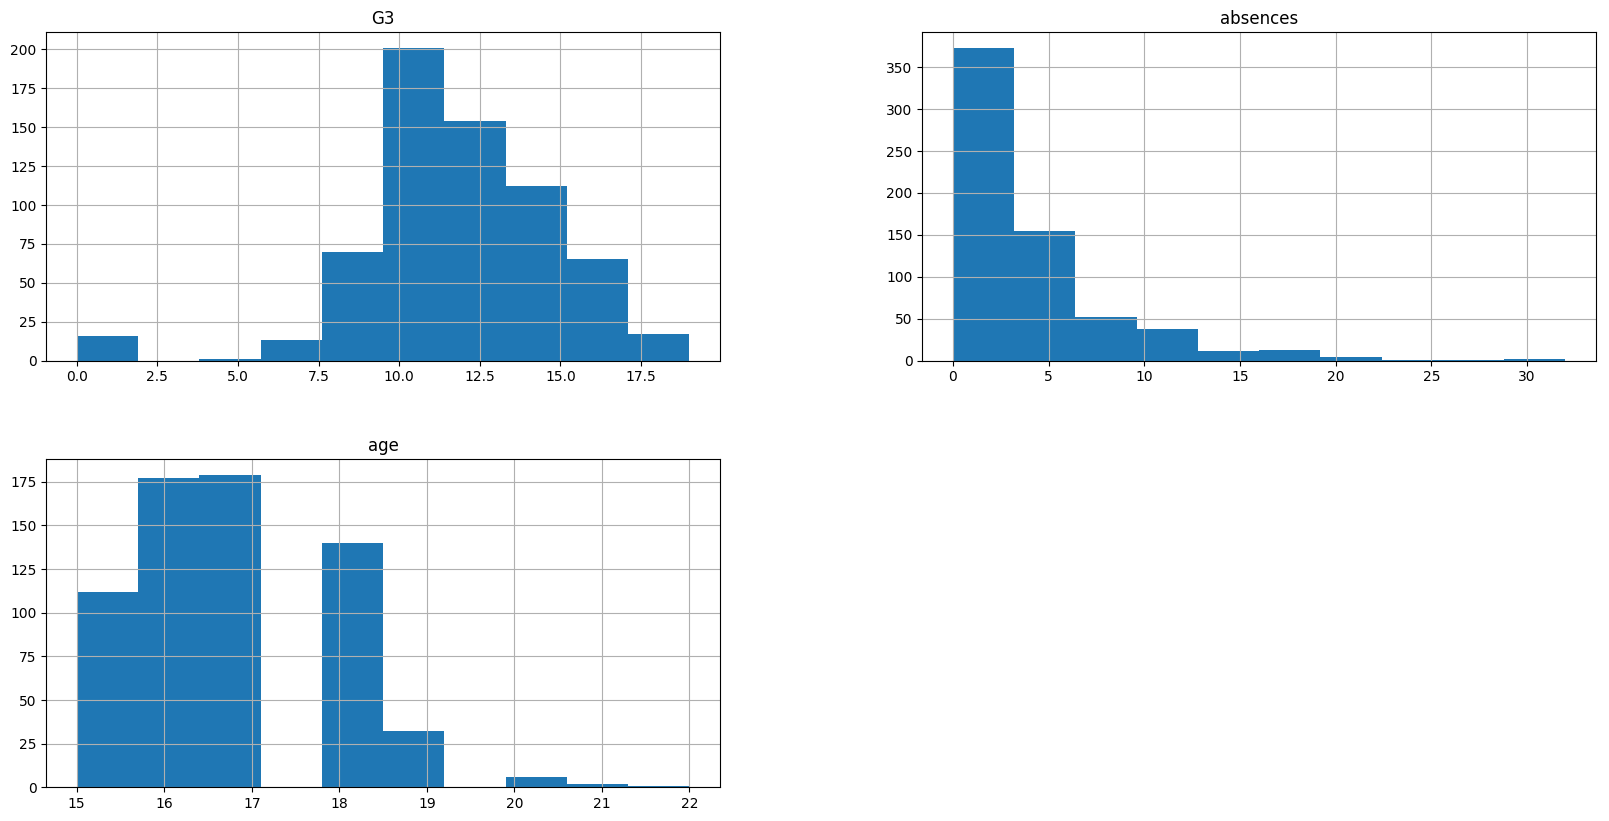

In [66]:
Port.toPandas()[['age','absences','G3']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1db16fc780>]],
      dtype=object)

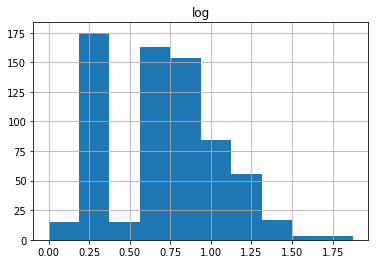

In [22]:
from pyspark.sql.functions import col
df.withColumn("log",log10(df["absences"])).toPandas()[['log']].hist()

In [56]:
PortD=Port.drop(col("G2"))
PortD=PortD.drop(col("G1"))

In [57]:
##7.1 split
# Step 7: Data Mining
# Splitting data into 80-20 training and test sets.
train, test = PortD.randomSplit([0.8, 0.2], seed=1)
print("Train Data count:")
print(train.count())
print("Test Data count:")
print(test.count())

Train Data count:
524
Test Data count:
125


In [58]:
constructed=construct(PortD,categorical_columns,numerical_columns)

In [60]:
ctrain=construct(train,categorical_columns,numerical_columns)

In [30]:
## modeling

In [61]:
# Kmeans
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=4, seed=1)  # 2 clusters here
kmodel = kmeans.fit(constructed.select('features'))

In [62]:
transformed = kmodel.transform(constructed) 

In [80]:
transformed

DataFrame[onehot_sex: vector, onehot_famsize: vector, onehot_Pstatus: vector, onehot_schoolsup: vector, onehot_famsup: vector, onehot_paid: vector, onehot_higher: vector, onehot_internet: vector, onehot_romantic: vector, age: int, Medu: int, Fedu: int, traveltime: int, studytime: int, failures: int, famrel: int, freetime: int, goout: int, Dalc: int, health: int, absences: int, features: vector, label: double, prediction: int]

In [63]:
transformedpd=transformed.toPandas()

In [65]:
###!pip3 install plotly

In [37]:
import plotly.express as px

In [66]:
dfpd["prediction"]=transformedpd["prediction"]

In [83]:
polar=dfpd.groupby("prediction").mean().reset_index()
polar=pd.melt(polar,id_vars=["prediction"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="prediction", line_close=True,height=600,width=1000)
fig4.show()

In [68]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [69]:
log_reg = LogisticRegression(featuresCol='features',labelCol='label')

In [70]:
stringindexer_stages = [StringIndexer(inputCol=c, outputCol='strindexed_' + c) for c in categorical_columns]
    # encode label column and add it to stringindexer_stages
stringindexer_stages += [StringIndexer(inputCol='G3', outputCol='label')]
    
onehotencoder_stages = [OneHotEncoder(inputCol='strindexed_' + c, outputCol='onehot_' + c) for c in categorical_columns]
    
feature_columns = ['onehot_' + c for c in categorical_columns]
feature_columns += numerical_columns
vectorassembler_stage = VectorAssembler(inputCols=feature_columns, outputCol='features')
    

pipeline = Pipeline(stages=stringindexer_stages + onehotencoder_stages + [vectorassembler_stage]+[log_reg])
pipeline_model = pipeline.fit(train)

In [71]:
results = pipeline_model.transform(train)

In [72]:
# Evaluate the model using the binary classifer.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='label')

In [110]:
from pyspark.sql.functions import sum as fsum

In [73]:
results.select('label','prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  2.0|       2.0|
|  6.0|       1.0|
|  0.0|       3.0|
|  3.0|       1.0|
|  2.0|       2.0|
|  3.0|       2.0|
|  3.0|       2.0|
|  0.0|       2.0|
|  5.0|       4.0|
|  6.0|       3.0|
|  5.0|       9.0|
|  2.0|       0.0|
|  3.0|       4.0|
|  3.0|       2.0|
|  2.0|       4.0|
|  0.0|       3.0|
|  2.0|      11.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  1.0|       0.0|
+-----+----------+
only showing top 20 rows



In [74]:
AUC = my_eval.evaluate(results)
AUC

0.69375

In [75]:
stringindexer_stages = [StringIndexer(inputCol=c, outputCol='strindexed_' + c) for c in categorical_columns]
    # encode label column and add it to stringindexer_stages
stringindexer_stages += [StringIndexer(inputCol='G3', outputCol='label')]
    
#onehotencoder_stages = [OneHotEncoder(inputCol='strindexed_' + c, outputCol='onehot_' + c) for c in categorical_columns]
    
#feature_columns = ['onehot_' + c for c in categorical_columns]
feature_columns = numerical_columns
vectorassembler_stage = VectorAssembler(inputCols=feature_columns, outputCol='features')

pipeline2 = Pipeline(stages=stringindexer_stages +  [vectorassembler_stage]+[log_reg])
pipeline_model2 = pipeline2.fit(train)

In [76]:
results2 = pipeline_model2.transform(train)

In [77]:
AUC = my_eval.evaluate(results2)
AUC

0.6085633116883117

In [131]:
R2(results2)

-0.3086234118728022


In [50]:
resu=results.toPandas()

Text(0.5,1,'label vs prediction with one-hot')

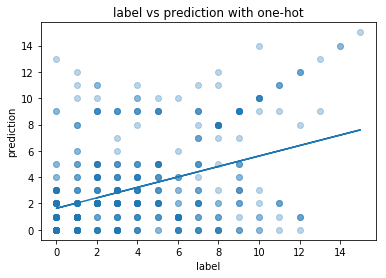

In [51]:
plt.scatter(resu['label'], resu['prediction'],cmap='viridis',alpha=0.3);
m, b = np.polyfit(resu['label'], resu['prediction'], 1)
plt.plot(resu['label'], m*resu['label'] + b)
plt.xlabel('label') 
plt.ylabel('prediction') 
plt.title("label vs prediction with one-hot")

Text(0.5,1,'label vs prediction without one-hot')

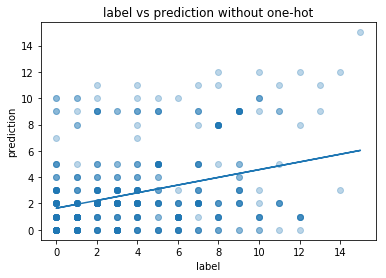

In [52]:
resu=results2.toPandas()
plt.scatter(resu['label'], resu['prediction'],cmap='viridis',alpha=0.3);
m, b = np.polyfit(resu['label'], resu['prediction'], 1)
plt.plot(resu['label'], m*resu['label'] + b)
plt.xlabel('label') 
plt.ylabel('prediction') 
plt.title("label vs prediction without one-hot")